# Comic Book Character Weight Analysis

## Author: Oliver Gladfelter

## Date: Sep 6, 2018

In [29]:
from IPython.display import Image
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
from random import randint
import numpy as np

# Importing and concatenating DC + Marvel data, subsetting to height range 

In [30]:
marvel = pd.read_csv("MarvelDataComplete.csv")
DC = pd.read_csv("DCDataComplete.csv")
del marvel['Unnamed: 0']
del DC['Unnamed: 0']
marvel['publisher'] = 'Marvel'
DC['publisher'] = 'DC'

data = pd.concat([marvel,DC])
data = data.reset_index()
del data['index']

# Focusing just of characters between 58 and 76 inches
normalHeightData = data[(data['heightInInches'] < 77) & (data['heightInInches'] > 57)]
normalHeightData = normalHeightData.reset_index()

In [12]:
normalHeightData.tail(2)

,index,link,gender,height,weight,firstAppearance,firstAppearanceDate,yearFirstAppeared,heightInInches,weightInPounds,name,universe,publisher
5481,6436,http://dc.wikia.com/wiki/Percival_Edmund_Chang...,Male,"5' 3""",250 lbs (113 kg),Deathmate Black,1993,1993,63,250,Percival Edmund Chang,Wildstorm Universe,DC
5482,6437,http://dc.wikia.com/wiki/Caitlin_Fairchild_(Wi...,Female,"6' 4""",300 lbs (136 kg),Deathmate Black,1993,1993,76,300,Caitlin Fairchild,Wildstorm Universe,DC


# A Look At Weight/Height Combinations
### For any given height, there is a typical/expected weight range. Here we measure the number of characters falling below the minimum expected weight for their height. We assume that this makes the character 'underweight.'

For any given height, there is an expected weight range. The dataframe below contains the minimum and maximum expected weights for any given height between 58-76 inches. We will use this to evaluate whether super hero characters are within normal weight ranges or not.

Source: https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf 

In [35]:
height = [58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76]
minWeight = [91,94,97,100,104,107,110,114,118,121,125,128,132,136,140,144,148,152,156]
maxWeight = [118,123,127,131,135,140,144,149,154,158,163,168,173,178,183,188,193,199,204]

# A data frame of expected weight ranges by height
weightDF = pd.DataFrame({'height':height,'minWeight':minWeight,'maxWeight':maxWeight})

weightDF.head(3)

,height,minWeight,maxWeight
0,58,91,118
1,59,94,123
2,60,97,127


In [ ]:
# Referencing character's heights in the 'weightDF' to determine if they are under, over, or within their heights' normal weight range 
normalHeightData['weightCategory'] = ''

for num in range(0,len(normalHeightData)):
    if normalHeightData['weightInPounds'][num] < int(weightDF.loc[weightDF['height'] == normalHeightData['heightInInches'][num]]['minWeight']):
        normalHeightData['weightCategory'][num] = 'under'
    elif normalHeightData['weightInPounds'][num] > int(weightDF.loc[weightDF['height'] == normalHeightData['heightInInches'][num]]['maxWeight']):
        normalHeightData['weightCategory'][num] = 'over'
    elif (normalHeightData['weightInPounds'][num] >= int(weightDF.loc[weightDF['height'] == normalHeightData['heightInInches'][num]]['minWeight'])) & (normalHeightData['weightInPounds'][num] <= int(weightDF.loc[weightDF['height'] == normalHeightData['heightInInches'][num]]['maxWeight'])):
        normalHeightData['weightCategory'][num] = 'normal'
    else:
        normalHeightData['weightCategory'][num] = -1

In [5]:
# Splitting into male and female data sets
femalesNormalHeight = normalHeightData[normalHeightData['gender']=='Female']
malesNormalHeight = normalHeightData[normalHeightData['gender']=='Male']

In [15]:
print(len(femalesNormalHeight[femalesNormalHeight['weightCategory'] == 'under']) / len(femalesNormalHeight) * 100,"% of female characters are underweight")
print(len(malesNormalHeight[malesNormalHeight['weightCategory'] == 'under']) / len(malesNormalHeight) * 100,"% of male characters are underweight")
print("")
print(len(femalesNormalHeight[femalesNormalHeight['weightCategory'] == 'over']) / len(femalesNormalHeight) * 100,"% of female characters are overweight")
print(len(malesNormalHeight[malesNormalHeight['weightCategory'] == 'over']) / len(malesNormalHeight) * 100,"% of male characters are overweight")

30.048959608323134 % of female characters are underweight
2.338269680436477 % of male characters are underweight

9.1187270501836 % of female characters are overweight
58.664588204728496 % of male characters are overweight


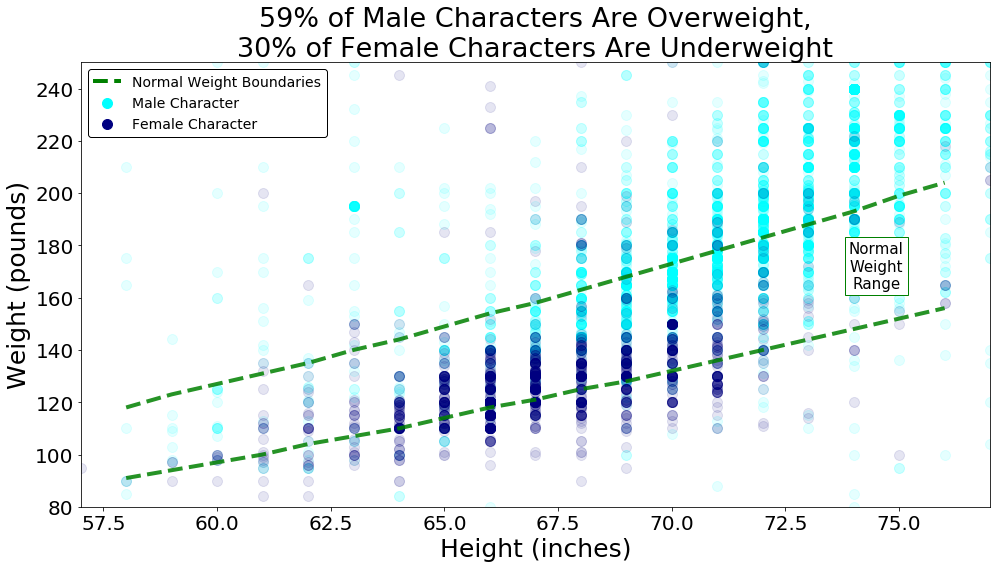

In [487]:
f = plt.figure(figsize=(14,8))
plt.plot(weightDF['height'], weightDF['minWeight'], alpha = .85, color = 'green', lw = 4,linestyle='dashed',label='Normal Weight Boundaries')
plt.plot(weightDF['height'], weightDF['maxWeight'], alpha = .85, color = 'green', lw = 4,linestyle='dashed',label = '')


plt.scatter(males['heightInInches'],males['weightInPounds'],color = 'aqua', alpha = .1, s = 100, label = 'Male Character')

plt.scatter(females['heightInInches'],females['weightInPounds'], color = 'navy', alpha = .1, s = 100, label = 'Female Character')
plt.xlim(57,77)
plt.ylim(80,250)
leg = plt.legend(loc=2,fontsize = 14,edgecolor='black', framealpha=1)
plt.text(74.5,172,"Normal\nWeight\nRange",fontsize=15,horizontalalignment='center',verticalalignment='center',bbox=dict(edgecolor='green',facecolor='white',alpha=1))
plt.ylabel("Weight (pounds)",fontsize = 25)
plt.xlabel("Height (inches)",fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("59% of Male Characters Are Overweight,\n30% of Female Characters Are Underweight",fontsize = 27)

for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
plt.tight_layout()
plt.savefig("C:\\Users\\glol7001\\Pictures\\MarvelWeightByHeight", transparent = False)

# Height and Weight Averages By Gender
An important note on color in gender data diz: https://blog.datawrapper.de/gendercolor/

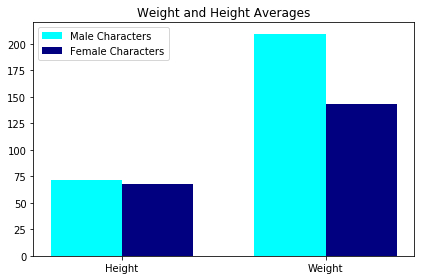

In [529]:
n_groups = 2
male = (malesNormalHeight['heightInInches'].mean(),malesNormalHeight['weightInPounds'].mean())
female = (femalesNormalHeight['heightInInches'].mean(),femalesNormalHeight['weightInPounds'].mean())
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35

rects1 = ax.bar(index, male, bar_width,
                color='aqua',
                label='Male Characters')

rects2 = ax.bar(index + bar_width, female, bar_width,
                color='navy',
                label='Female Characters')

ax.set_title('Weight and Height Averages')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Height', 'Weight'))
ax.legend()

fig.tight_layout()
plt.show()

# Weight Distributions of Characters, Overall & By Gender

C:\Users\glol7001\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\glol7001\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


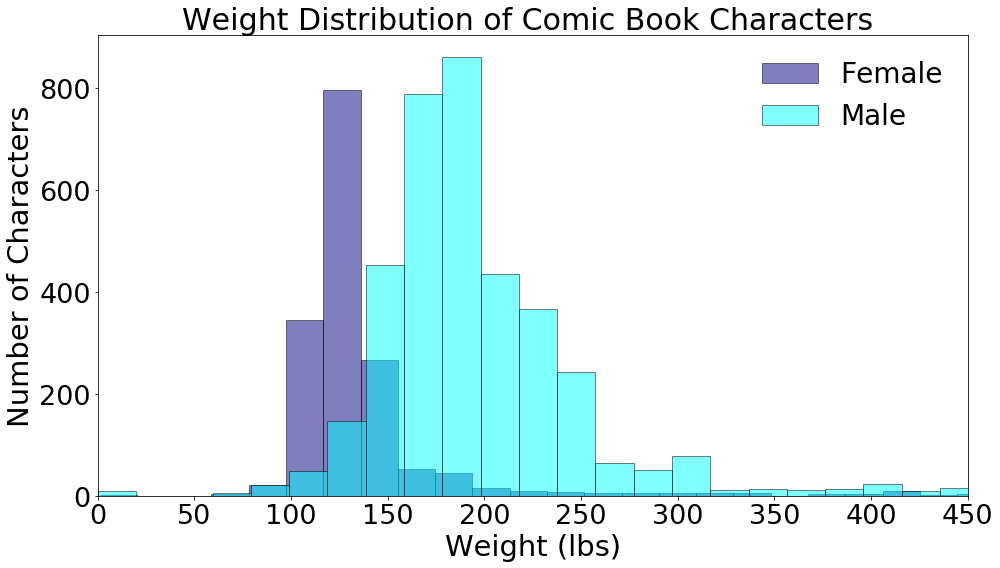

In [439]:
f = plt.figure(figsize=(14,8))
sns.distplot(femalesNormalHeight['weightInPounds'], kde=False, rug=False, hist_kws={"alpha": .5, "edgecolor":"black","color": "navy", "label":"Female"})
sns.distplot(malesNormalHeight['weightInPounds'], kde=False, rug=False, hist_kws={"alpha": .5, "edgecolor":"black","color": "aqua", "label":"Male"})
plt.legend(loc='best',fontsize=28, edgecolor = 'white')
plt.xlabel("Weight (lbs)", fontsize = 29)
plt.ylabel("Number of Characters", fontsize = 29, rotation=90)
plt.xlim(0,450)
plt.xticks(fontsize = 27)
plt.yticks(fontsize = 27)
plt.title("Weight Distribution of Comic Book Characters ", fontsize = 30)
plt.tight_layout()
#plt.savefig("C:\\Users\\glol7001\\Pictures\\MarvelWeight", transparent = False)

# Changes Over Time

In [ ]:
# Creates a dummy variable, = 1 if character is underweight, 0 if not
def isUnderWeight(value):
    if value == 'under':
        return 1
    else:
        return 0
    
# Creates a dummy variable, = 1 if character is overweight, 0 if not
def isOverWeight(value):
    if value == 'over':
        return 1
    else:
        return 0

femalesNormalHeight['underWeight'] = femalesNormalHeight['weightCategory'].apply(isUnderWeight)
femalesNormalHeight['overWeight'] = femalesNormalHeight['weightCategory'].apply(isOverWeight)

malesNormalHeight['underWeight'] = malesNormalHeight['weightCategory'].apply(isUnderWeight)
malesNormalHeight['overWeight'] = malesNormalHeight['weightCategory'].apply(isOverWeight)

femalesNormalHeight['newCharacters'] = 1
malesNormalHeight['newCharacters'] = 1

# Group by year on a sum to count number of characters introduced each year
femalesByYear = femalesNormalHeight.groupby('yearFirstAppeared').sum()
malesByYear = malesNormalHeight.groupby('yearFirstAppeared').sum()

femalesByYear = femalesByYear.reset_index()
malesByYear = malesByYear.reset_index()

In [17]:
# Calculates total number of characters over time, so should increase every year as new characters are added
femalesByYear['underWeightCum'] = femalesByYear['underWeight'][0]
femalesByYear['overWeightCum'] = femalesByYear['overWeight'][0]
femalesByYear['newCharactersCum'] = femalesByYear['newCharacters'][0]

for num in range(1,len(femalesByYear)):
    femalesByYear['underWeightCum'][num] = femalesByYear['underWeightCum'][num-1] + femalesByYear['underWeight'][num]
    femalesByYear['overWeightCum'][num] = femalesByYear['overWeightCum'][num-1] + femalesByYear['overWeight'][num]
    femalesByYear['newCharactersCum'][num] = femalesByYear['newCharactersCum'][num-1] + femalesByYear['newCharacters'][num]
    
# For any given year, % of existing female characters that are underweight and overweight
femalesByYear['underWeight%'] = femalesByYear['underWeightCum']/femalesByYear['newCharactersCum']
femalesByYear['overWeight%'] = femalesByYear['overWeightCum']/femalesByYear['newCharactersCum']

# Calculates total number of characters over time, so should increase every year as new characters are added
malesByYear['underWeightCum'] = malesByYear['underWeight'][0]
malesByYear['overWeightCum'] = malesByYear['overWeight'][0]
malesByYear['newCharactersCum'] = malesByYear['newCharacters'][0]

for num in range(1,len(malesByYear)):
    malesByYear['underWeightCum'][num] = malesByYear['underWeightCum'][num-1] + malesByYear['underWeight'][num]
    malesByYear['overWeightCum'][num] = malesByYear['overWeightCum'][num-1] + malesByYear['overWeight'][num]
    malesByYear['newCharactersCum'][num] = malesByYear['newCharactersCum'][num-1] + malesByYear['newCharacters'][num]
    
# For any given year, % of existing male characters that are underweight and overweight
malesByYear['underWeight%'] = malesByYear['underWeightCum']/malesByYear['newCharactersCum']
malesByYear['overWeight%'] = malesByYear['overWeightCum']/malesByYear['newCharactersCum']

In [18]:
# 30% of female characters are underweight, and that's been the case for 10 years - and doesn't appear to be changing any time soon
femalesByYear.tail(10)

,yearFirstAppeared,Unnamed: 0,heightInInches,weightInPounds,underWeight,overWeight,newCharacters,underWeightCum,overWeightCum,newCharactersCum,underWeight%,overWeight%
65,2009,44914,2095,3927,14,1,31,402,121,1335,0.301124,0.090637
66,2010,47396,2813,5710,12,5,42,414,126,1377,0.300654,0.091503
67,2011,161112,3817,7838,21,5,56,435,131,1433,0.303559,0.091417
68,2012,96005,3287,6487,19,3,49,454,134,1482,0.306343,0.090418
69,2013,89383,3384,7763,12,5,50,466,139,1532,0.304178,0.090731
70,2014,30308,820,2002,1,2,12,467,141,1544,0.302461,0.091321
71,2015,98000,4466,10159,18,6,66,485,147,1610,0.301242,0.091304
72,2016,18182,664,1309,4,2,10,489,149,1620,0.301852,0.091975
73,2017,10409,451,833,2,0,7,491,149,1627,0.301782,0.091580
74,2018,5417,466,909,0,0,7,491,149,1634,0.300490,0.091187


Text(0.5,0,'Year')

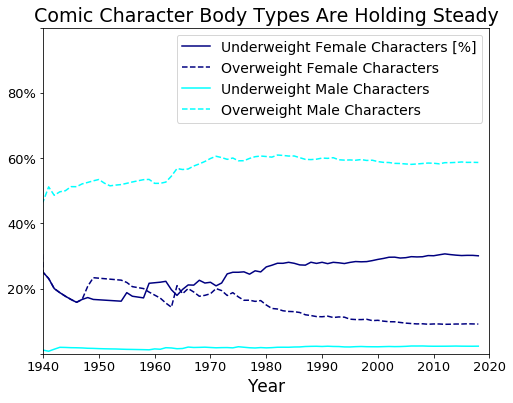

In [19]:
f = plt.figure(figsize=(8,6))
plt.plot(femalesByYear['yearFirstAppeared'],femalesByYear['underWeight%'],color='navy',label='Underweight Female Characters [%]')
plt.plot(femalesByYear['yearFirstAppeared'],femalesByYear['overWeight%'], color = 'navy', linestyle = 'dashed', label='Overweight Female Characters')
plt.plot(malesByYear['yearFirstAppeared'],malesByYear['underWeight%'], color = 'aqua', label='Underweight Male Characters')
plt.plot(malesByYear['yearFirstAppeared'],malesByYear['overWeight%'], color = 'aqua', linestyle = 'dashed', label='Overweight Male Characters')
plt.legend(bbox_to_anchor=(1,1),loc='best',fontsize=14)

#plt.legend(bbox_to_anchor=(.09,-.08), loc="upper left",fontsize=14, ncol = 4)

plt.ylim(0,1)
plt.yticks([0,.2,.4,.6,.8,1],['','20%','40%','60%','80%',''],fontsize = 13)
plt.xticks(fontsize=13)
plt.xlim(1940,2020)
plt.title("Comic Character Body Types Are Holding Steady",fontsize = 19)
plt.xlabel('Year',fontsize = 17)

# Interactive Body Type Comparison
Based on a given height and weight, what characters are of similar body type? Are these characters taller or shorter than most others? Heavier or lighter? What body types are over- and underrepresented in the comic book universe? and we’ll show you which characters are of similar body type? 

For this section either the full data set or the 'normalHeights' data sets may be used. I use the latter for demonstration purposes.

### Enter your height and weight, and I will:

-Tell you how many characters have you same body type, and give some examples

-Tell you how many characters fall within a single deviation of your height and weight

-Show you where you fit within the overall universe

In [526]:
def heightWeightCompare(userHeight, userWeight, showGender = "Show All", title="Your Body Type Compared To The Comic Book Universe",annotateLabel = 'You'):
    
    if showGender == "Show Male Characters":
        data = malesNormalHeight
        legendLabel1 = " Male "
    elif showGender == "Show Female Characters":
        data = femalesNormalHeight
        legendLabel1 = " Female "
    else:
        data = normalHeightData
        legendLabel1 = " "
        
    userData = data[(data['heightInInches'] == userHeight) & (data['weightInPounds'] == userWeight)]
    userData = userData.reset_index()
    
    if len(userData) == 0:
        text1 = "There are no known characters\nof your height and weight"
        print(text1)
    elif len(userData) == 1:
        text1 = "There is one character\nof your height and weight:", userData['name'][0]
        print(text1)
    elif len(userData) <= 10:
        text1 = "There are " + str(len(userData)) + legendLabel1.lower()+ "characters\nof your height and weight"
        print(text1 + ":")
        for num in range(0,len(userData)):
            print(userData['name'][num])
    elif len(userData) > 10:
        text1 = "There are " + str(len(userData)) + legendLabel1.lower()+ "characters\nof your height and weight"
        print(text1+",", "including",userData['name'][randint(0, len(userData)-1)]+",",userData['name'][randint(0, len(userData)-1)] + ",","and",userData['name'][randint(0, len(userData)-1)]+".")
    
    print(" ")

    # Calculating low and high weight/height values for standard deviation
    heightLow = userHeight - np.std(data['heightInInches'])
    heightHigh = userHeight + np.std(data['heightInInches'])
    weightLow = userWeight - np.std(data['weightInPounds'])
    weightHigh = userWeight + np.std(data['weightInPounds'])  
    
    # subsetting data to include only characters within a standard deviation of given height and weight
    userDataPlusMinusSD = data[(data['heightInInches'] >= heightLow) & (data['heightInInches'] <= heightHigh) & (data['weightInPounds'] >= weightLow) & (data['weightInPounds'] <= weightHigh)]
    
    text2 = str('{:2.1f}%'.format(len(userDataPlusMinusSD) / len(data) * 100)) + " of"+legendLabel1.lower()+ "characters\nare between " + str('{:2.1f}'.format(heightLow)) + " and\n" + str('{:2.1f}'.format(heightHigh)) + " inches tall\nand weigh between\n" + str('{:2.1f}'.format(weightLow)) + " and " + str('{:2.1f}'.format(weightHigh)) + " pounds"
    print(text2)
    
    # plotting all of this information
    f = plt.figure(figsize=(14,8))

    plt.scatter(data['heightInInches'],data['weightInPounds'],c='gray',alpha=.2,label='All' + legendLabel1 + 'Characters')
    plt.scatter(userDataPlusMinusSD['heightInInches'],userDataPlusMinusSD['weightInPounds'],c='blue',alpha=.2,label='Characters with Comparable Body Type')
    plt.scatter(userHeight,userWeight,s=500,color='red',edgecolor='black',label=annotateLabel)

    plt.title(title,fontsize = 27)

    plt.ylabel("Weight (pounds)",fontsize = 25)
    plt.yticks(fontsize=20)

    plt.xlabel("Height (inches)",fontsize = 25)
    plt.xticks(fontsize=20)
    plt.xlim(data['heightInInches'].min()-5,data['heightInInches'].max()+10)

    leg = plt.legend(loc=2,fontsize=14,edgecolor='black',framealpha=1)
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    leg.legendHandles[2]._sizes = [50]
    #plt.annotate(annotateLabel, color='red',verticalalignment = 'center',horizontalalignment = 'left', fontsize = 30,xy=(userHeight+1,userWeight), xytext=(userHeight+5, userWeight),
                #arrowprops=dict(edgecolor='red',facecolor='red',alpha=1, shrink=30))

    plt.text(data['heightInInches'].max()+5,800,text1,fontsize = 14, horizontalalignment = 'center',bbox=dict(edgecolor='red',facecolor='red', alpha=0.5))
    plt.text(data['heightInInches'].max()+5,400,text2,fontsize = 14, horizontalalignment = 'center',bbox=dict(edgecolor='red',facecolor='red', alpha=0.5))

    plt.show()

There are 11 male characters
of your height and weight, including Phantom Stranger, Phantom Stranger, and Mikal Drakonmegas.
 
55.9% of male characters
are between 70.8 and
77.2 inches tall
and weigh between
95.5 and 274.5 pounds


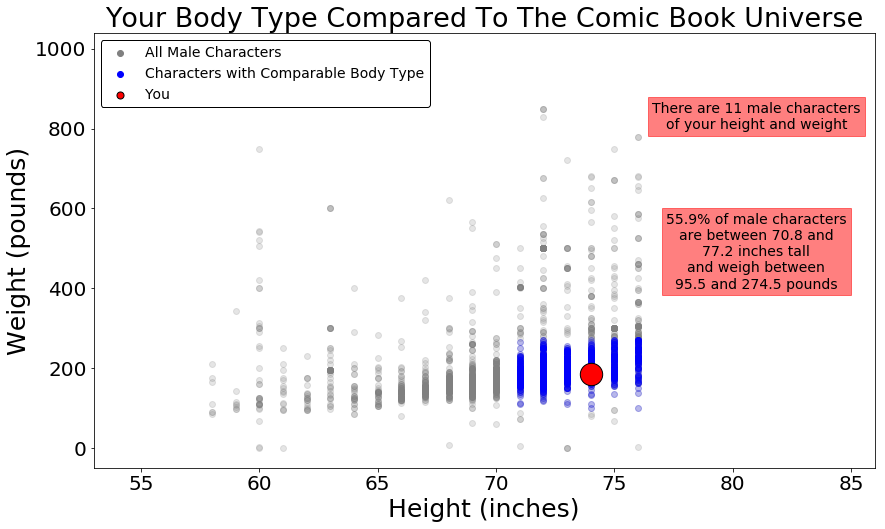

In [527]:
heightWeightCompare(74, 185, "Show Male Characters")

## Let's see what happens when we compare with the average USA male and female weight/height values

Average american women:
168.5 pounds
64 inches

Average american male: 
195.5 pounds
69.3 inches

Sources: 
https://www.healthline.com/health/womens-health/average-weight-for-women#takeaway, 
https://www.npr.org/2014/07/25/332641840/the-average-american-man-is-too-big-for-his-britches

There are no known characters
of your height and weight
 
37.8% of characters
are between 61.2 and
66.8 inches tall
and weigh between
93.3 and 242.7 pounds


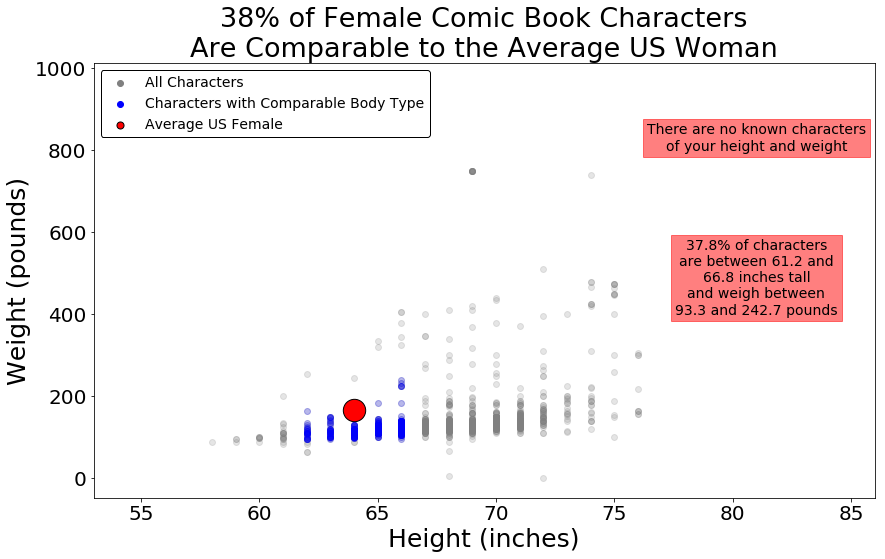

In [515]:
heightWeightCompare(64, 168, showGender = "Show Female Characters",title="38% of Female Comic Book Characters\nAre Comparable to the Average US Woman",annotateLabel="Average US Female")

There are 4 characters
of your height and weight:
Arides
James Darnell
James Howlett
James Howlett
 
51.6% of characters
are between 65.8 and
72.2 inches tall
and weigh between
105.5 and 284.5 pounds


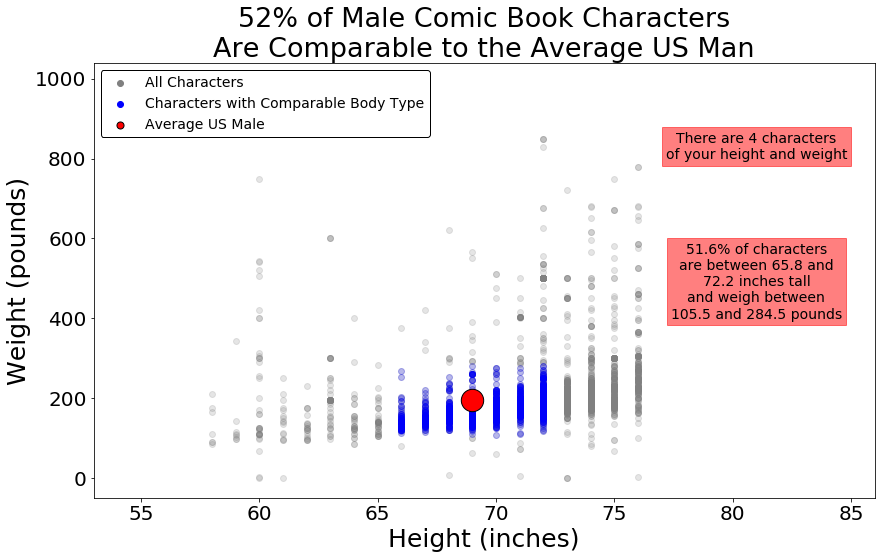

In [516]:
heightWeightCompare(69, 195, showGender = "Show Male Characters",title="52% of Male Comic Book Characters\nAre Comparable to the Average US Man",annotateLabel="Average US Male")

# How Do My Favorite Characters Compare?

Enter a character’s name to see their height and weight, as well as their comparison to other comic book characters.

In [13]:
def characterCompare(characterName):
    characterData = data[(data['name'] == characterName) & (data['universe'] == 'Earth-616')]
    characterData = characterData.reset_index()

    compareHeightCharacterData = data[data['heightInInches'] < characterData['heightInInches'][0]]
    tallerThan = str('{:2.1f}%'.format(len(compareHeightCharacterData) / len(data) * 100))

    compareWeightCharacterData = data[data['weightInPounds'] < characterData['weightInPounds'][0]]
    heavierThan = str('{:2.1f}%'.format(len(compareWeightCharacterData) / len(data) * 100))

    if characterData['gender'][0] == 'Male':
        HeShe = 'He'
    elif characterData['gender'][0] == 'Female':
        HeShe = 'She'

    print(characterName, "is",characterData['heightInInches'][0],"inches tall, which is taller than", tallerThan, "of all characters.")
    print(HeShe, "weighs", characterData['weightInPounds'][0],"pounds, which is heavier than",heavierThan,"of all characters.")
    
    heightWeightCompare(characterData['heightInInches'][0], characterData['weightInPounds'][0], normalHeightData,characterName+ " Compared To The Comic Book Universe",characterName)

Peter Parker is 70 inches tall, which is taller than 37.7% of all characters.
He weighs 167 pounds, which is heavier than 40.7% of all characters.
There are 32 characters
of your height and weight, including Otto Octavius, Peter Parker, and Peter Parker.
 
57.3% of characters
are between 66.4 and
73.6 inches tall
and weigh between
76.4 and 257.6 pounds


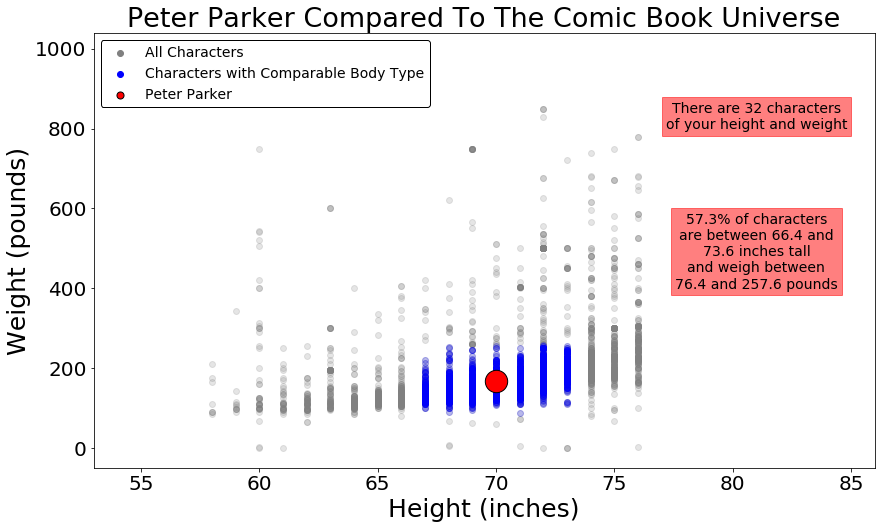

In [14]:
characterCompare('Peter Parker')

# For both male and female groups, there were no significant differences in the height/weights of heroes and villains.

### [character affiliation data collection omitted, email me at ogladfelter@gmail and I'll be happy to share that code]

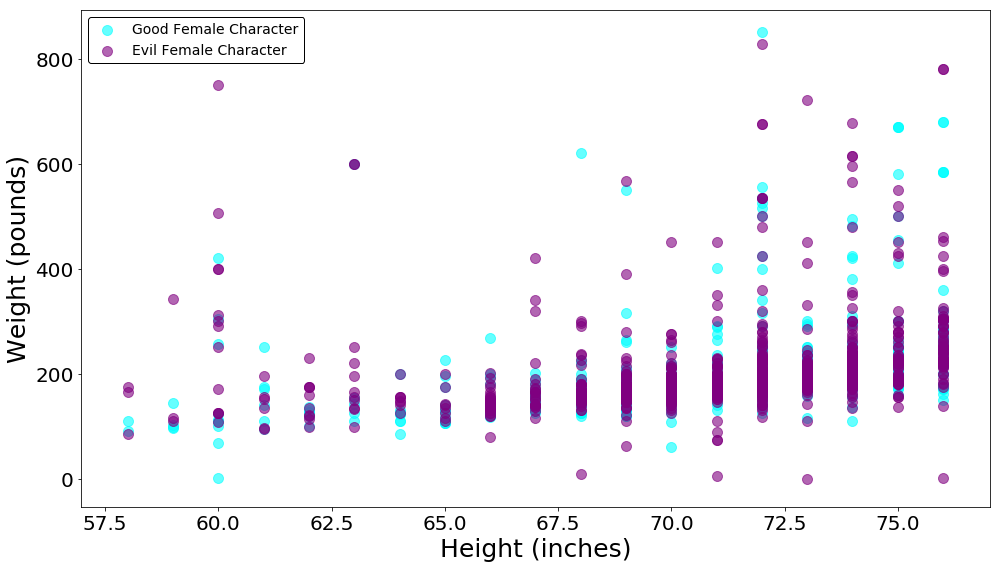

In [716]:
f = plt.figure(figsize=(14,8))

plt.scatter(goodMales['heightInInches'],goodMales['weightInPounds'],color = 'aqua', alpha = .6, s = 100, label = 'Good Female Character')

plt.scatter(evilMales['heightInInches'],evilMales['weightInPounds'], color = 'purple', alpha = .6, s = 100, label = 'Evil Female Character')

leg = plt.legend(loc=2,fontsize = 14,edgecolor='black', framealpha=1)
plt.ylabel("Weight (pounds)",fontsize = 25)
plt.xlabel("Height (inches)",fontsize = 25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

    
plt.tight_layout()